# Linear Regression

This tutorial shows how simple it is to implement a linear regression in python.

So a regression is about fitting a function (in the linear case a line) to given data points. Therefore the reconstruction cost is minimized such that for all datapoints x the squared distanze between its target value y and the function value f(x) of the fitted curve is minimal.

1) We need some data so create an array x with shape (100,1) that contains the numbers from -5 to 5.

2) Initialize the random number generator of numpy to 42.

3) Now add Gaussian random noise to x with a standard deviation of 1 and store the result in an array y.

4) Plot the datapoints as yellow dots in the range $x\in[-10,10]$ and $y\in[-10,10]$

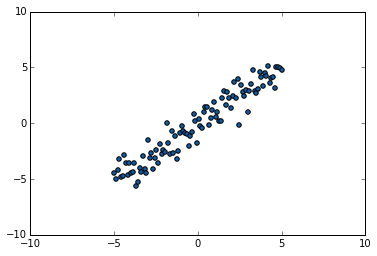

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x + np.random.normal(0, 1, x.shape)

plt.scatter(x, y, c='#115EA6')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
# our solution
from solutions import *
decrypt_solution(solution_regression_1, 'foo')

A linear regression for datapoint matrix $X$ ($D \times N$, D datapoints and N input dimensions) and target matrix $Y$ ($D \times M$, D datapoints and M output dimensions) is defined as:

$min \langle \frac{1}{2}\left(\vec{\vec{A}}\vec{x}-\vec{y}\right)^2 \rangle_d = min \frac{1}{2}\frac{1}{D}\sum_d^{D} \sum_i^{N} \sum_j^M \left(a_{ij} x_{di}-y_{dj}\right)^2$

where $\langle \cdot \rangle_d$ is the average over the Training data. 

We ignore the bias value for now!

1) Set the derivative to zero and solve the equation for $A$ to get the optima $A^*$. (Hint: If you have problems with the closed form solution with abitray dimensions, first solve the equation for 1D input and output)

2) Now plot the result

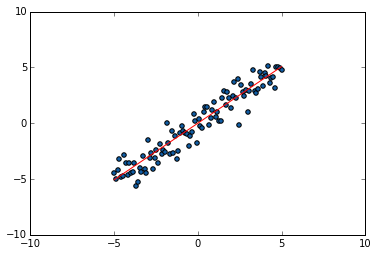

In [3]:
def regress(x, y):
    x_dim = x.shape[1]
    y_dim = y.shape[1]
    A_1 = np.zeros( (y_dim, x_dim) )
    A_2 = np.zeros( (x_dim, x_dim) )

    for k in range(0, x.shape[0]):
        A_1 += np.outer(y[k,:], x[k,:])
        A_2 += np.outer(x[k,:], x[k,:])
    A_2 = np.linalg.inv(A_2)

    return np.dot(A_1, A_2)

A = regress(x, y)
y_predicted = (np.dot(A, x.T)).T
plt.scatter(x, y, c='#115EA6')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.plot(x, y_predicted, c='#FF0000')
plt.show()

In [ ]:
# our solution
from solutions import *
decrypt_solution(solution_regression_2, 'foo')

A common way to integrate a bias value for many machine learning methods is to add a dimension which is constant one for all datapoints!

1) Modify the code by adding a second constant dimension to x and add 10 to y to shift the datapoints verctically.

2) Now plot the result in the range $x\in[-10,10]$ and $y\in[0,20]$, notice that you have to select the first dimension of x in order not to plot the constant dimension!

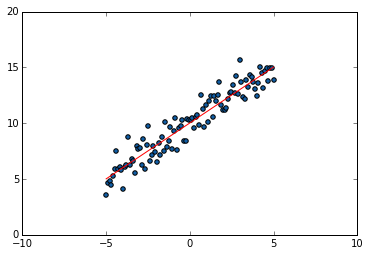

[[  1.00201703  10.02230459]]


In [4]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x + np.random.normal(0, 1, x.shape)
x = np.hstack( [x, np.ones((x.shape))] )
y += 10

A = regress(x, y)
y_predicted = (np.dot(A, x.T)).T
#plot_data(x[:,0], y_predicted, [-10, 10, 0, 20])
plt.scatter(x[:,0], y, c='#115EA6')
plt.xlim(-10, 10)
plt.ylim(0, 20)
plt.plot(x[:,0], y_predicted, c='#FF0000')
plt.show()
print(A)

In [ ]:
# our solution
from solutions import *
decrypt_solution(solution_regression_3, 'foo')

By using a polynomial expansion of x we can fit a polynome to the data.

Fit a ploynome of degree 5 to the data 

In [5]:
y = np.cos(x[:,0])+np.random.randn(100)*0.5

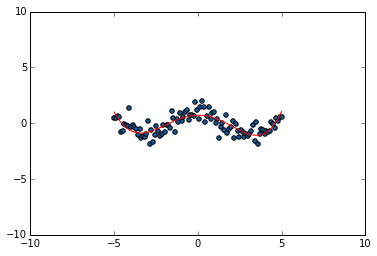

In [6]:
import numpy.polynomial as np_pol

# Expand data
y = y.reshape((-1,1))
def expanded(x, degree):
    new_dim = np_pol.polynomial.polypow(x[0], degree).size
    x_expanded = np.empty((x.shape[0], new_dim))
    
    for k in range(x.shape[0]):
        x_expanded[k] = np.polynomial.polynomial.polypow(x[k], degree)
    
    return x_expanded
x_ex = expanded(x, 5)

# Do regression
A = regress(x_ex, y)
y_predicted = (np.dot(A, x_ex.T)).T

# Plot
plt.scatter(x[:,0], y, c='#115EA6')
plt.plot(x[:,0], y_predicted, c='#FF0000')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
# our solution
from solutions import *
decrypt_solution(solution_regression_4, 'foo')

Now perform the same using the linear regression function np.polyfit(x,y,5) of numpy. Notice that x,y are 1D arrays here! 

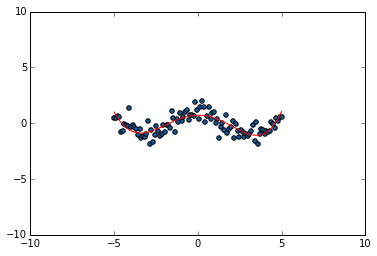

In [7]:
A = np_pol.polynomial.polyfit(x[:,0], y, 5)
y_predicted = np_pol.polynomial.polyval(x[:,0], A)

plt.scatter(x[:,0], y, c='#115EA6')
plt.plot(x[:,0], y_predicted[0,:].T, c='#FF0000')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
# our solution
from solutions import *
decrypt_solution(solution_regression_5, 'foo')